In [ ]:
import pandas as pd 

data = pd.read_excel("/divorce.xlsx")

data

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0


In [ ]:
data.isna().sum()


Atr1     0
Atr2     0
Atr3     0
Atr4     0
Atr5     0
Atr6     0
Atr7     0
Atr8     0
Atr9     0
Atr10    0
Atr11    0
Atr12    0
Atr13    0
Atr14    0
Atr15    0
Atr16    0
Atr17    0
Atr18    0
Atr19    0
Atr20    0
Atr21    0
Atr22    0
Atr23    0
Atr24    0
Atr25    0
Atr26    0
Atr27    0
Atr28    0
Atr29    0
Atr30    0
Atr31    0
Atr32    0
Atr33    0
Atr34    0
Atr35    0
Atr36    0
Atr37    0
Atr38    0
Atr39    0
Atr40    0
Atr41    0
Atr42    0
Atr43    0
Atr44    0
Atr45    0
Atr46    0
Atr47    0
Atr48    0
Atr49    0
Atr50    0
Atr51    0
Atr52    0
Atr53    0
Atr54    0
Class    0
dtype: int64

In [ ]:
data.isnull().values.any()

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


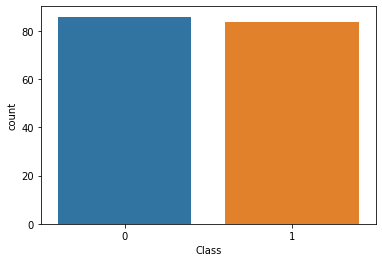

In [ ]:
import seaborn as sns

sns.countplot(data["Class"])

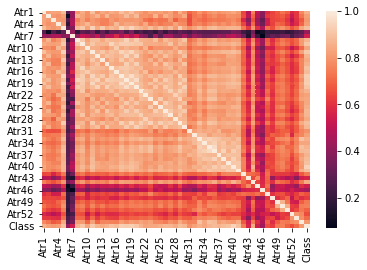

In [ ]:
sns.heatmap(data.iloc[:,:].corr())

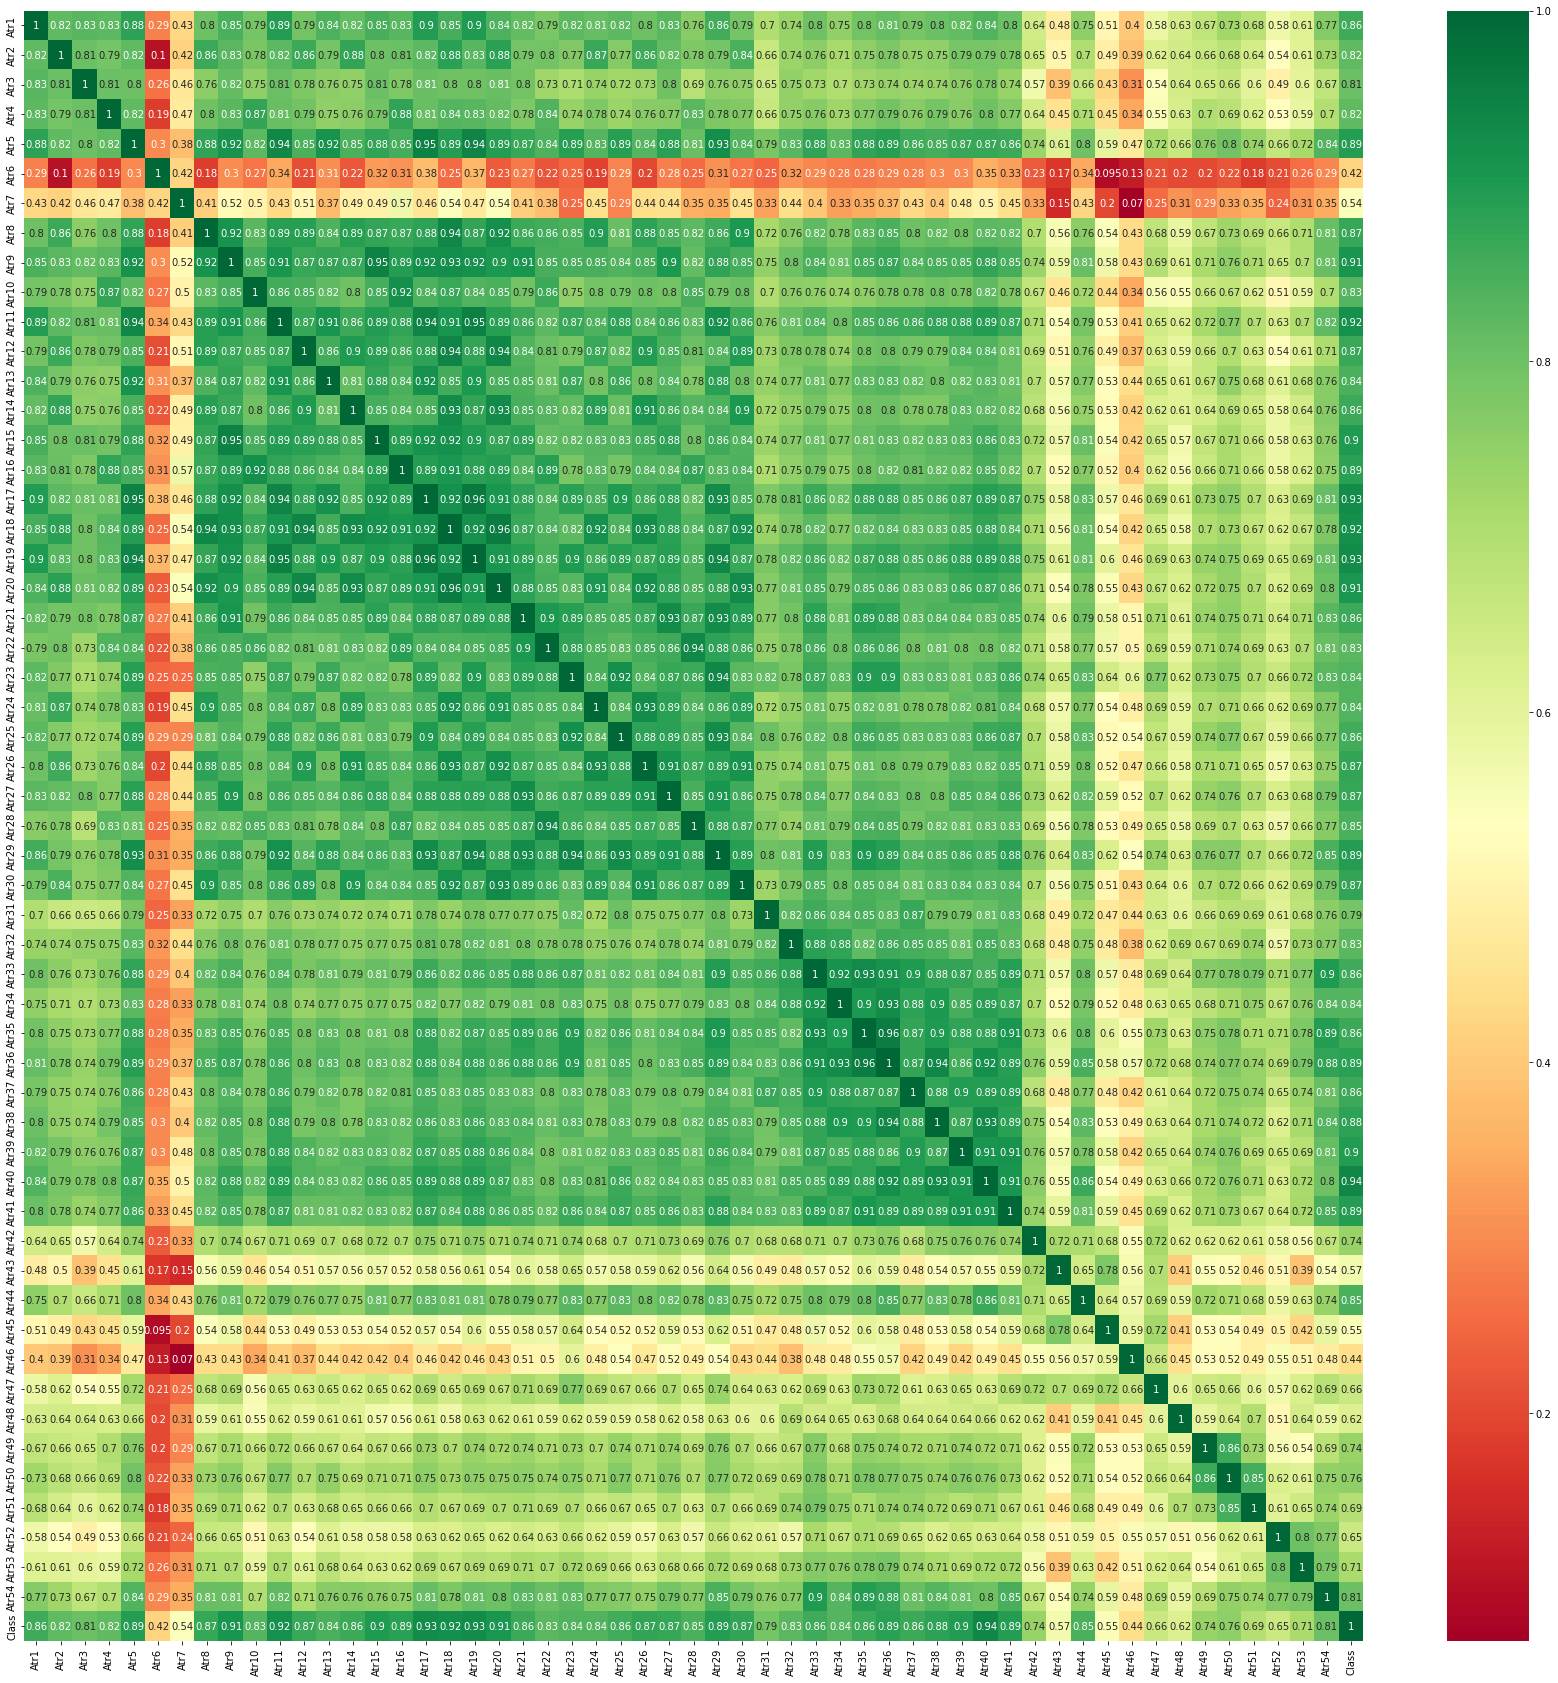

In [ ]:
import matplotlib.pyplot as plt
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (30,30))

g=sns.heatmap (data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
import numpy as np 

x = data.iloc[:, 1 : 55].values
y = data.iloc[:, -1].values

# Dividindo o dataset para o Training set e Test set  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)  

# Usando a machine learning de Naive Bayes para o Training set
from sklearn.naive_bayes import MultinomialNB  
classifier = MultinomialNB()  
classifier.fit(x_train, y_train)  

print("Training Accuracy: ")
test_train = classifier.score(x_train, y_train)
print(f' {round(test_train * 100, 3)}%')

Training Accuracy: 
 98.529%


In [ ]:
# Calculando o z-score das colunas   
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  


In [ ]:
# Fazendo o resultado da previsão do Test set  
y_pred = classifier.predict(x_test)  

NameError: ignored

testing accuracy = 94.118%


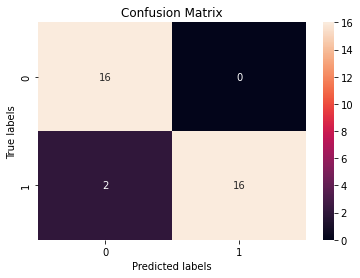

In [ ]:
# Fazendo a matriz de confusão 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)  
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1'])
test_acc = (TP + TN)/(TP + TN + FN + FP)*100
print(f'testing accuracy = {round(test_acc, 3)}%')

In [ ]:
import numpy as np 

x = data.iloc[:, 1 : 55].values
y = data.iloc[:, -1].values

# Dividindo o dataset para o Training set e Test set  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)  

# Usando a machine learning de Naive Bayes para o Training set 
from sklearn.naive_bayes import MultinomialNB  
classifier = MultinomialNB()  
classifier.fit(x_train, y_train)  

print("Training Accuracy: ")
test_train = classifier.score(x_train, y_train)
print(f' {round(test_train * 100, 3)}%')

Training Accuracy: 
 98.039%


In [ ]:
# Calculando o z-score das colunas 
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  


In [ ]:
# Fazendo o resultado da previsão do Test set 
y_pred = classifier.predict(x_test)  

testing accuracy = 97.059%


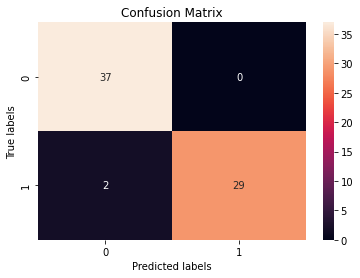

In [ ]:
# Fazendo a matriz de confusão  
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)  
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1'])
test_acc = (TP + TN)/(TP + TN + FN + FP)*100
print(f'testing accuracy = {round(test_acc, 3)}%')

In [ ]:
import numpy as np 

x = data.iloc[:, 1 : 55].values
y = data.iloc[:, -1].values

# Dividindo o dataset para o Training set e Test set  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)  

# Usando a machine learning de Naive Bayes para o Training set 
from sklearn.naive_bayes import MultinomialNB  
classifier = MultinomialNB()  
classifier.fit(x_train, y_train)  

print("Training Accuracy: ")
test_train = classifier.score(x_train, y_train)
print(f' {round(test_train * 100, 3)}%')

Training Accuracy: 
 98.319%


In [ ]:
# Calculando o z-score das colunas 
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  


In [ ]:
# Fazendo o resultado da previsão do Test set  
y_pred = classifier.predict(x_test)  

testing accuracy = 96.078%


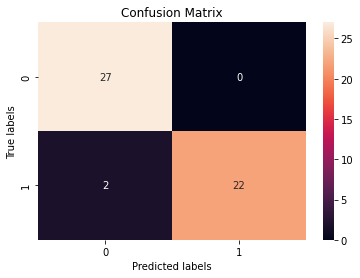

In [ ]:
# Fazendo a matriz de confusão  
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)  
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1'])
test_acc = (TP + TN)/(TP + TN + FN + FP)*100
print(f'testing accuracy = {round(test_acc, 3)}%')